# GSEA Pre-ranked DE genes

In [2]:
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import os
from gseapy.plot import barplot, dotplot

%matplotlib inline

In [3]:
datasetDir = './DE_results/Final/'
sample = 'MDA'

13_vs_proxy_parental_UP.csv
11_vs_proxy_parental_DOWN.csv
7_vs_proxy_parental_DOWN.csv
10_vs_proxy_parental_UP.csvo
9_vs_proxy_parental_UP.csv
p-Low_vs_p-LM2_DOWN.csv
10_vs_proxy_parental_DOWN.csv
13_vs_proxy_parental_DOWN.csv
2_vs_proxy_parental_UP.csv
5_vs_proxy_parental_UP.csv
3_vs_proxy_parental_DOWN.csv
Met-Like_parental_vs_rest_UP.csv
6_vs_proxy_parental_DOWN.csv
2_vs_proxy_parental_DOWN.csv
7_vs_proxy_parental_UP.csv
11_vs_proxy_parental_UP.csv
p-Low_vs_p-LM2_UP.csv
Met-Like_parental_vs_rest_DOWN.csv
1_vs_proxy_parental_UP.csv
4_vs_proxy_parental_UP.csv
p-Low_vs_p-Brm2_UP.csv
1_vs_proxy_parental_DOWN.csv


/wynton/home/pollard/egilbertson/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


12_vs_proxy_parental_UP.csv
p-Low_vs_p-BoM_UP.csv
8_vs_proxy_parental_UP.csv
p-Low_vs_p-BoM_DOWN.csv
6_vs_proxy_parental_UP.csv
3_vs_proxy_parental_UP.csv
8_vs_proxy_parental_DOWN.csv
9_vs_proxy_parental_DOWN.csv
4_vs_proxy_parental_DOWN.csv
p-Low_vs_p-Brm2_DOWN.csv
0_vs_proxy_parental_DOWN.csv
12_vs_proxy_parental_DOWN.csv
0_vs_proxy_parental_UP.csv
5_vs_proxy_parental_DOWN.csv


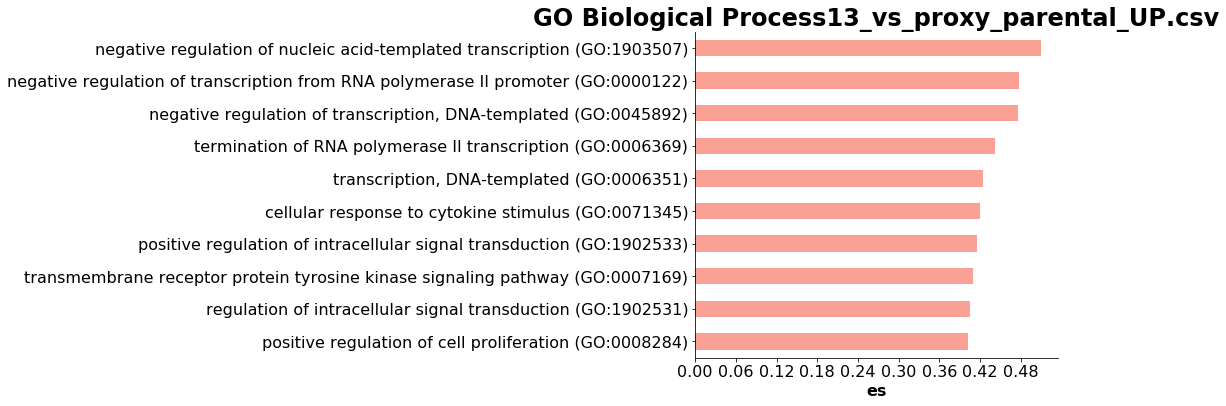

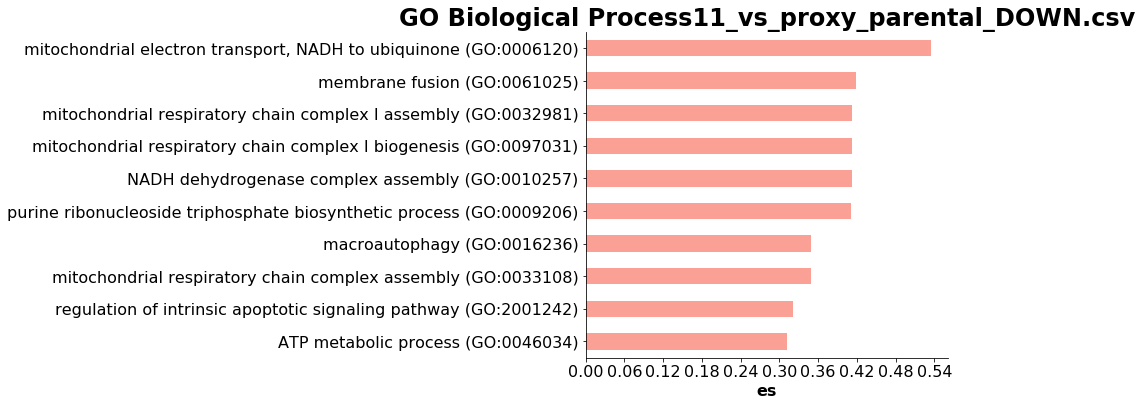

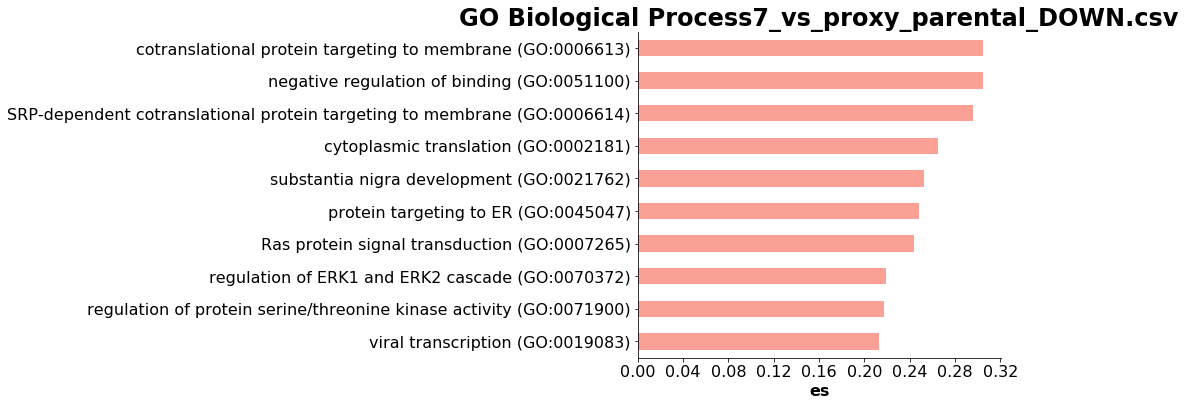

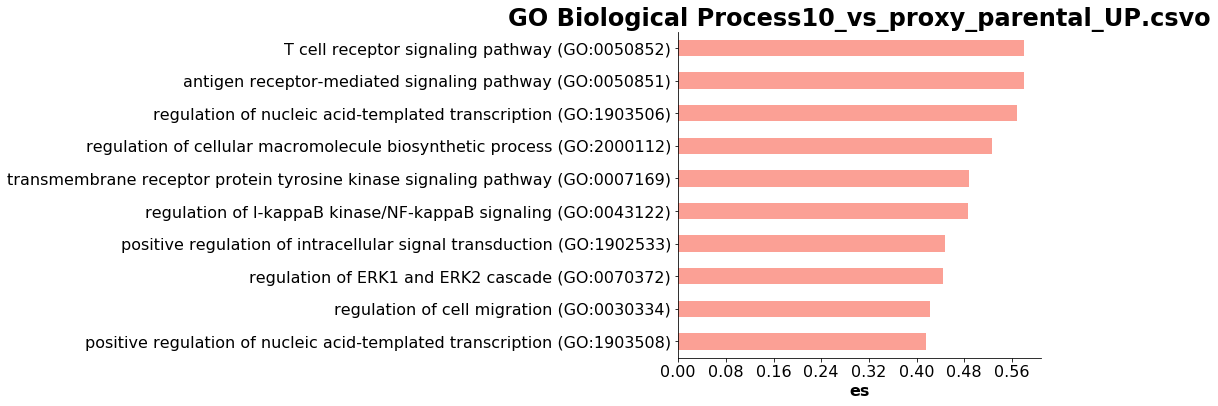

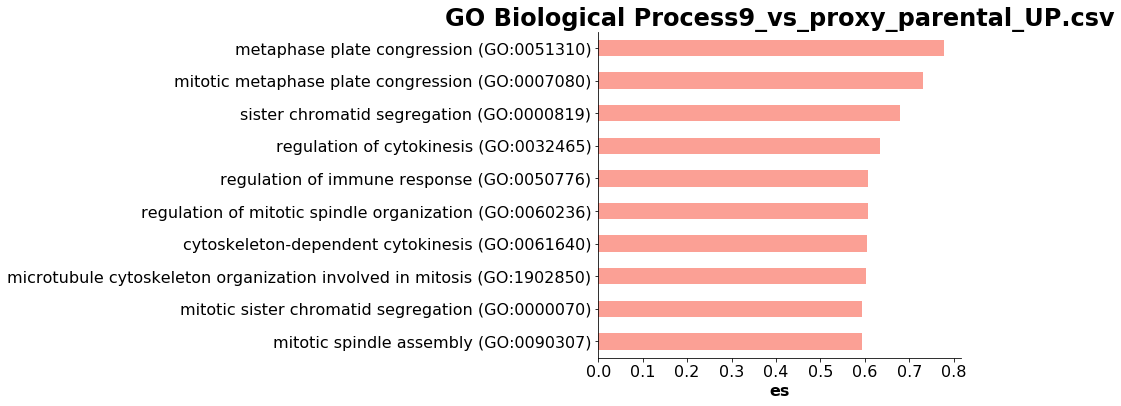

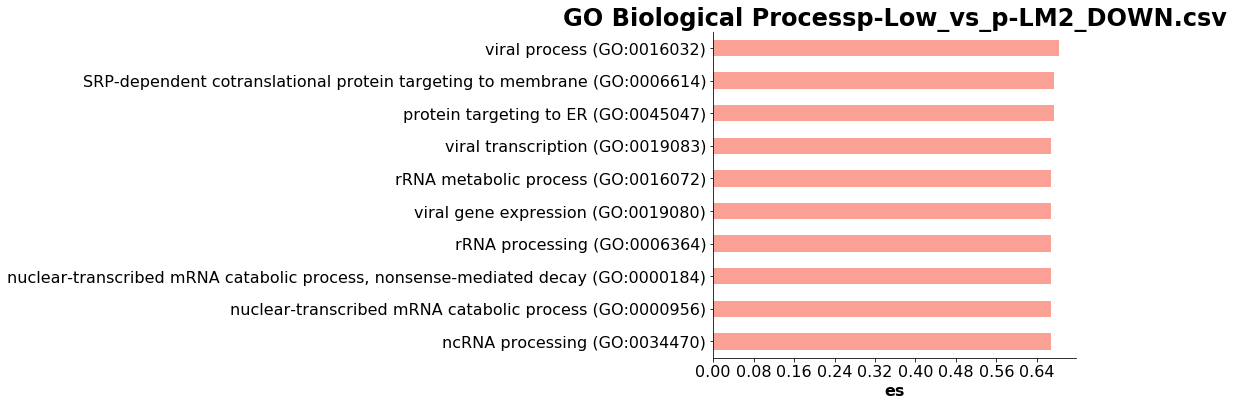

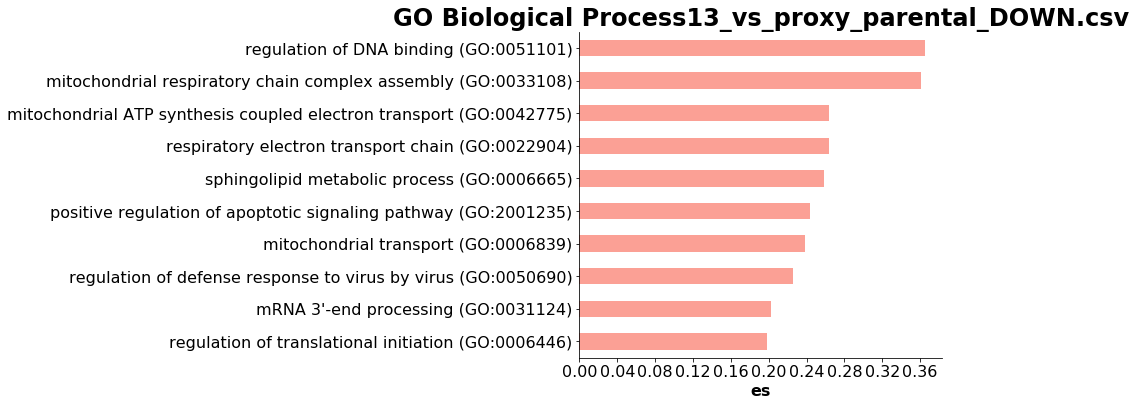

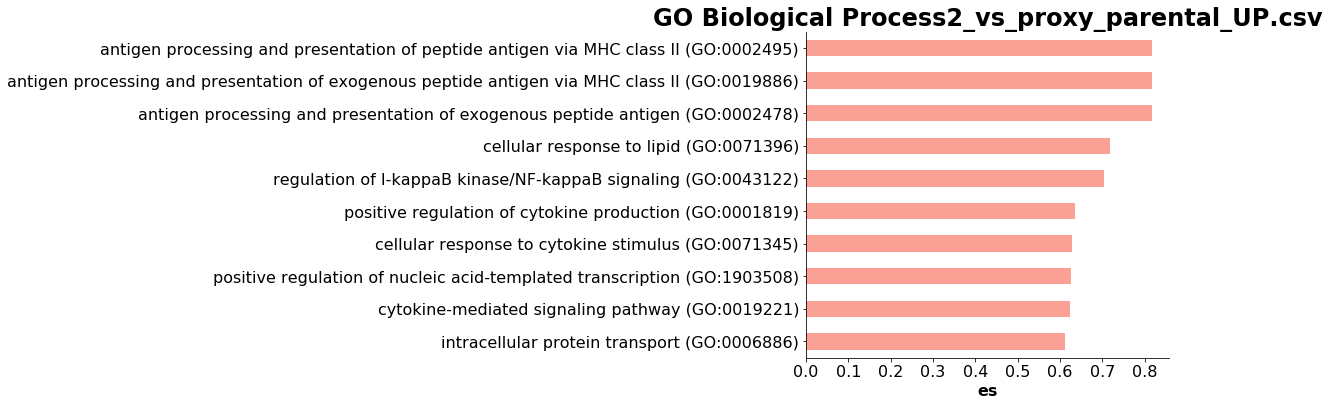

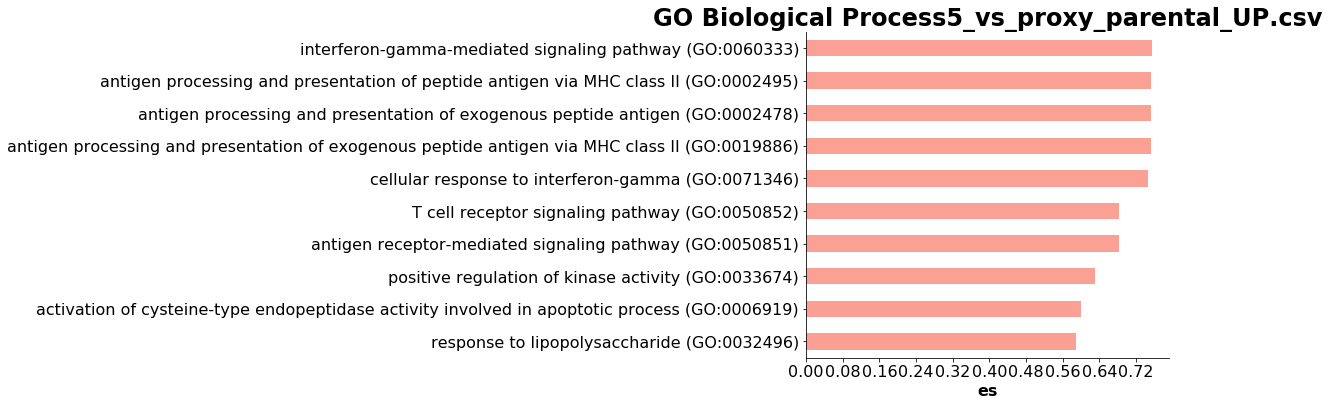

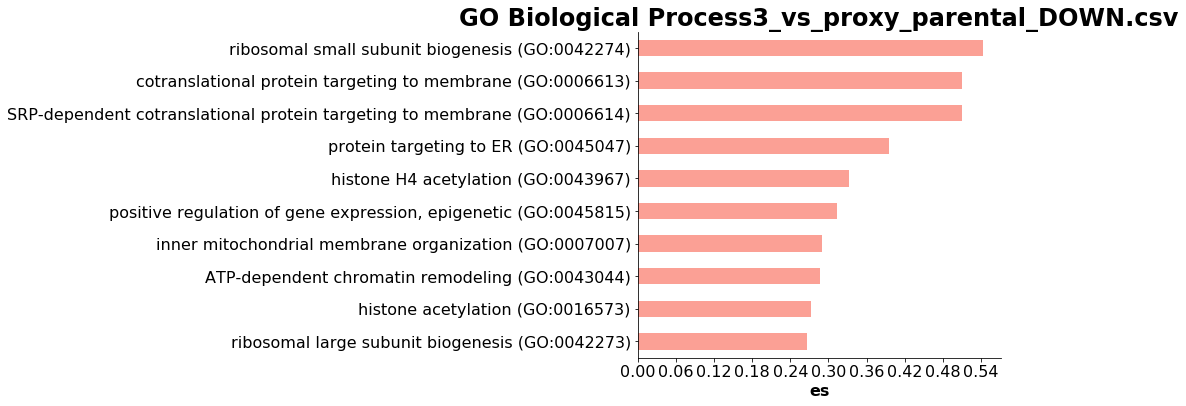

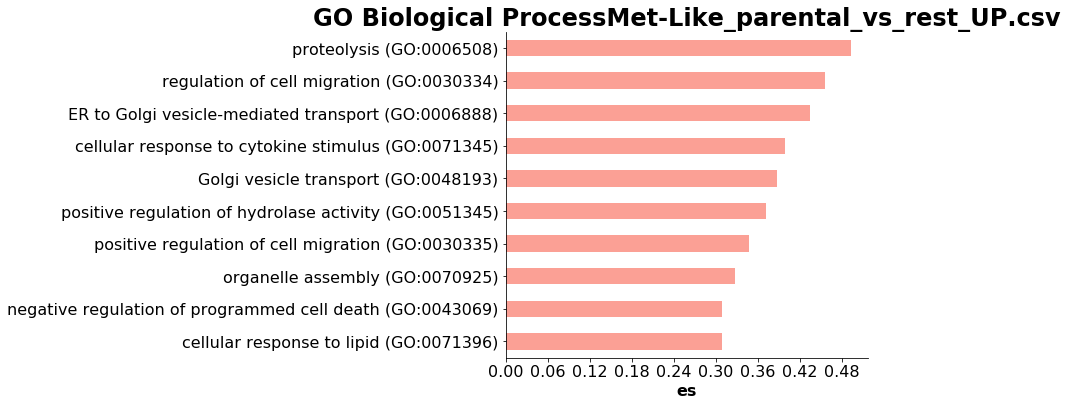

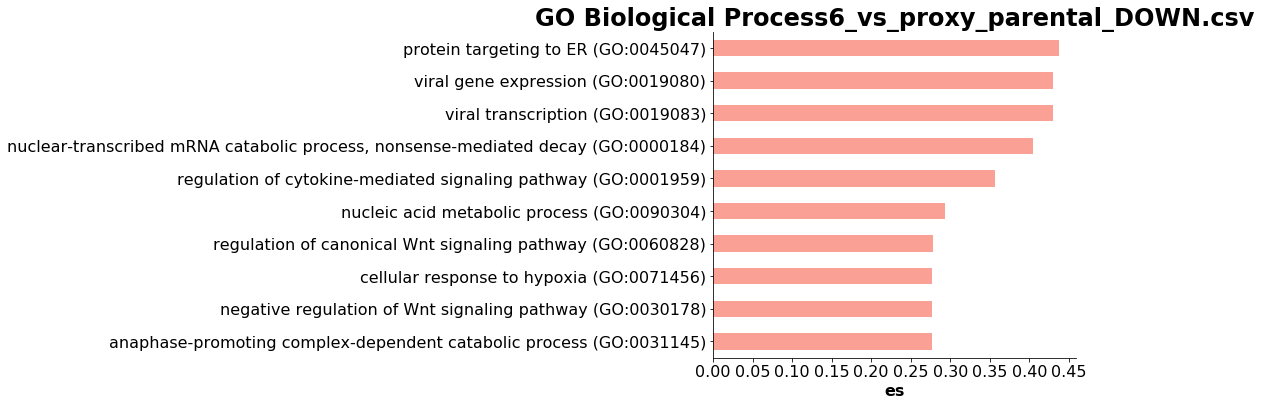

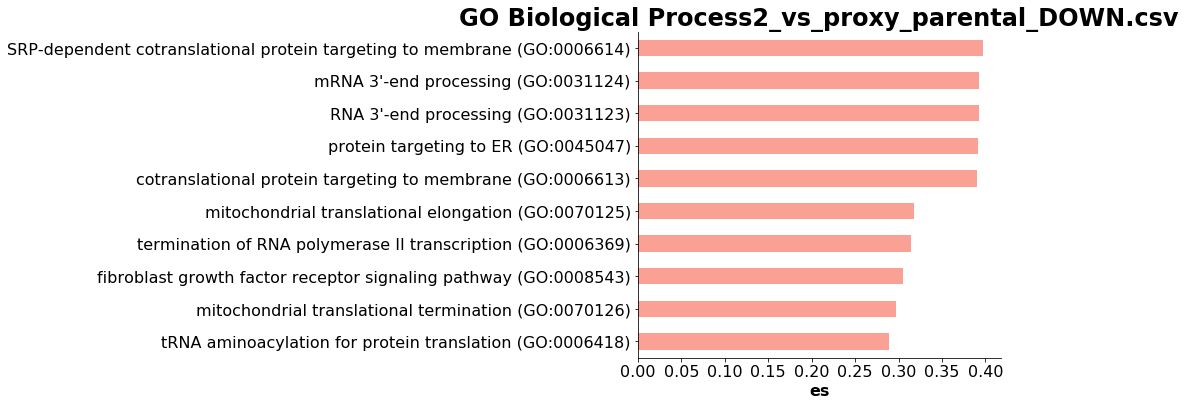

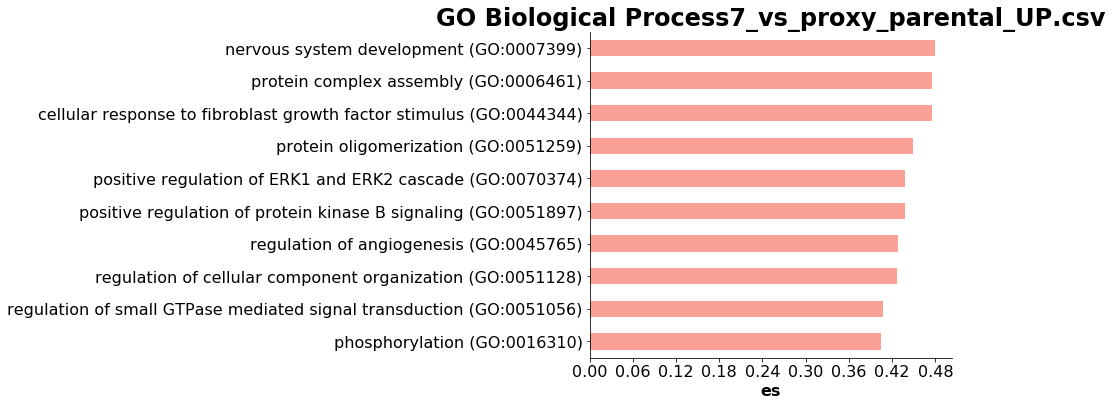

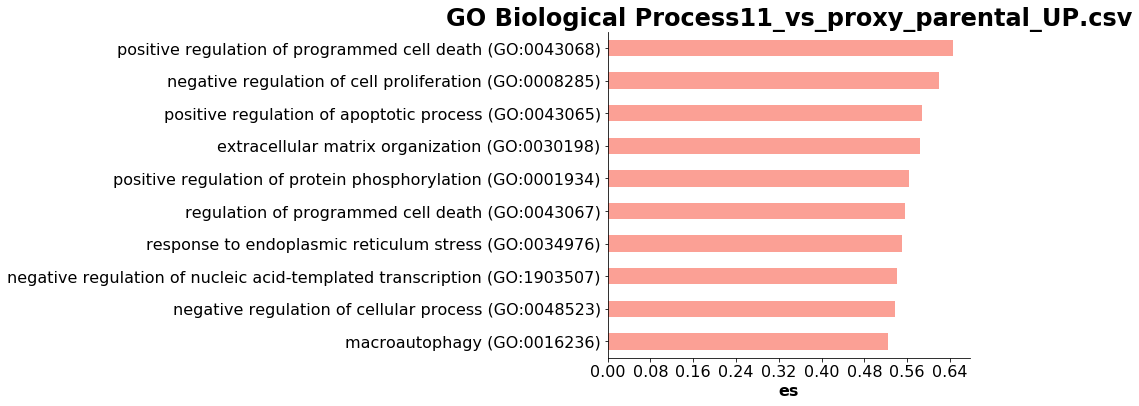

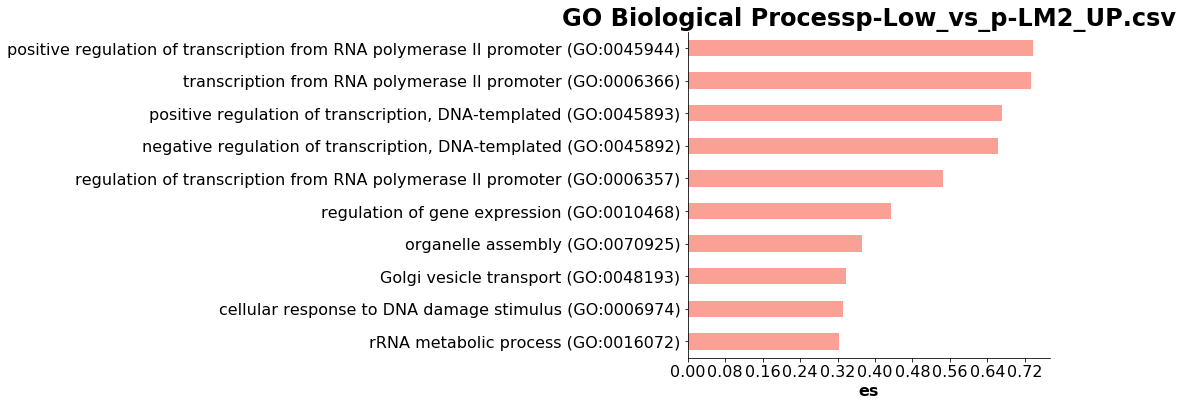

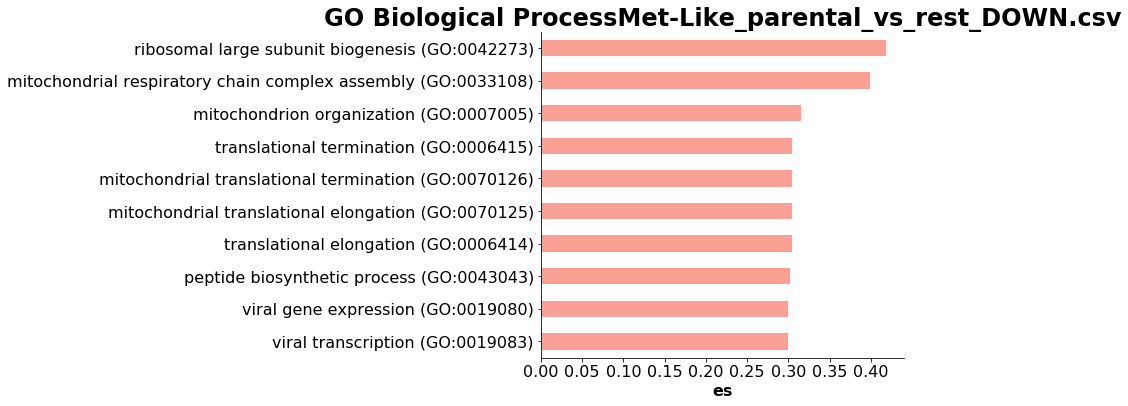

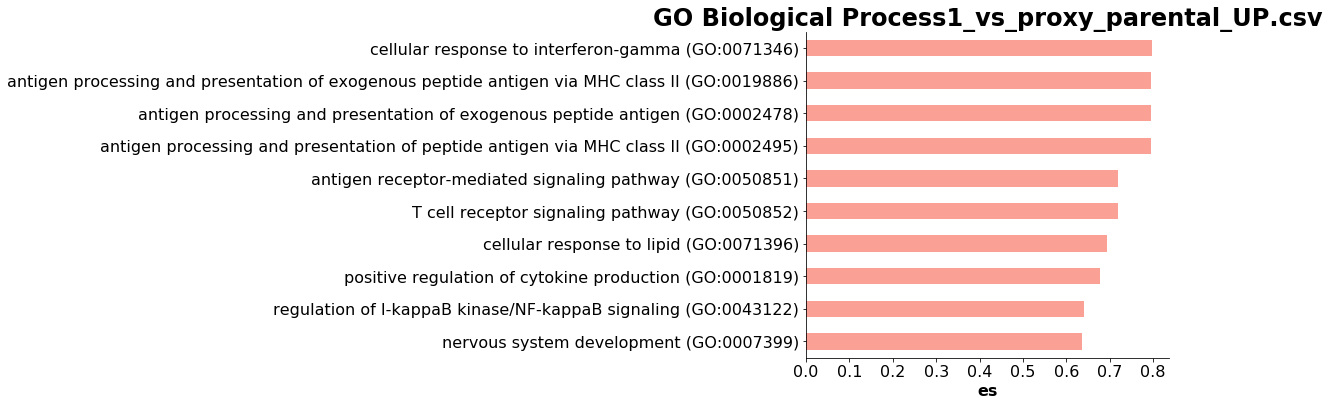

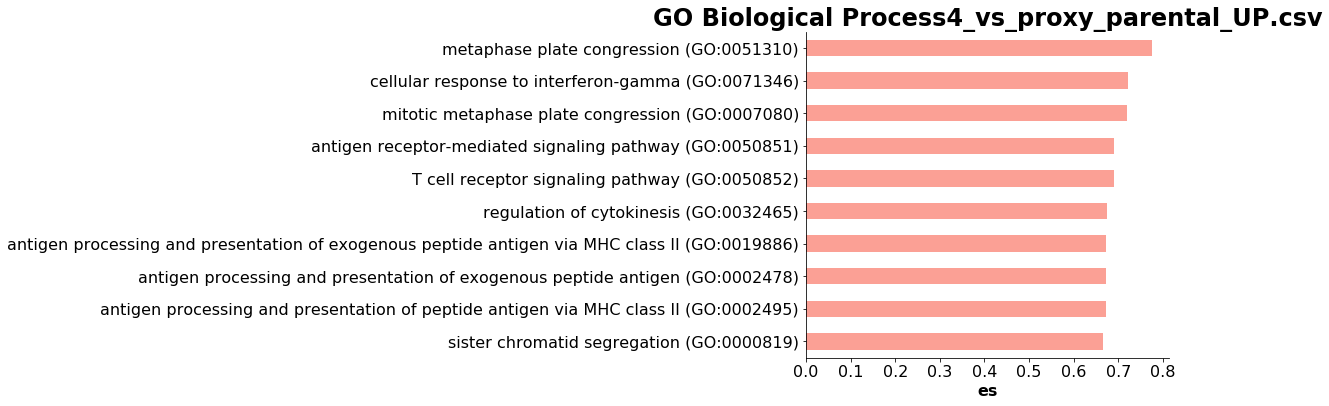

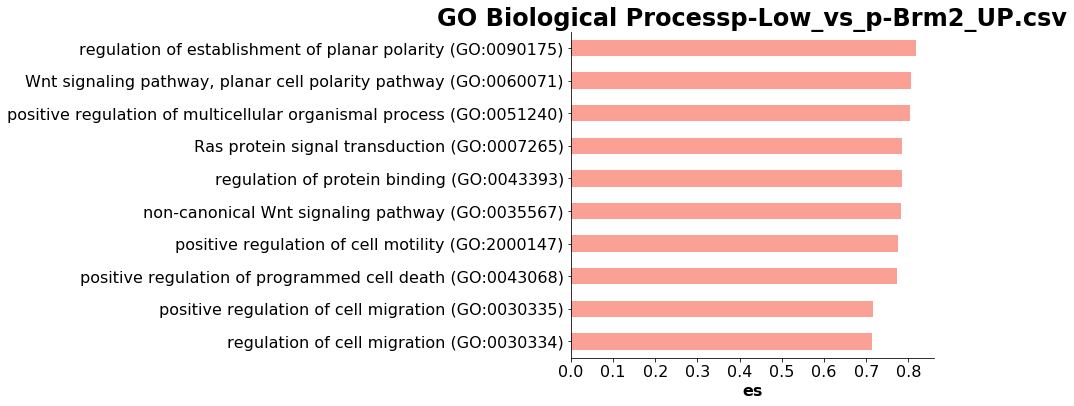

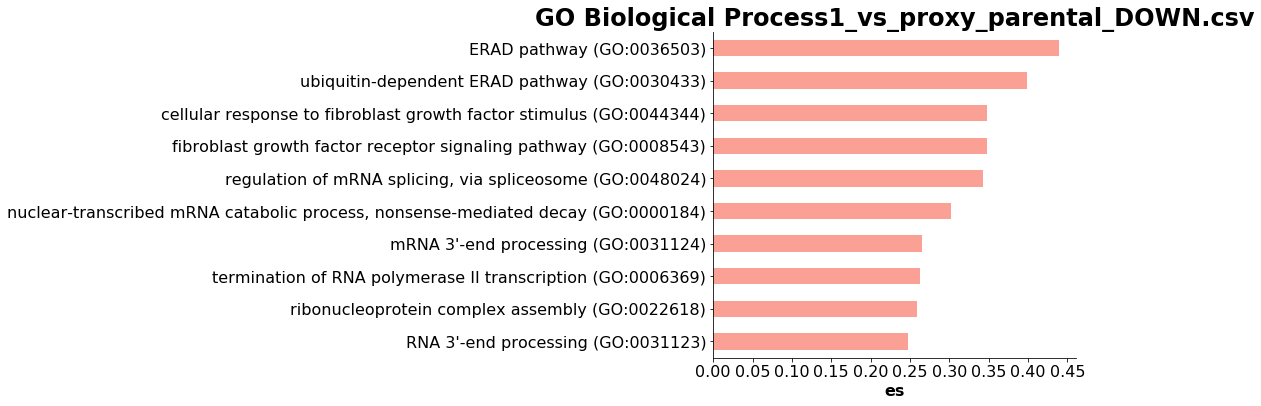

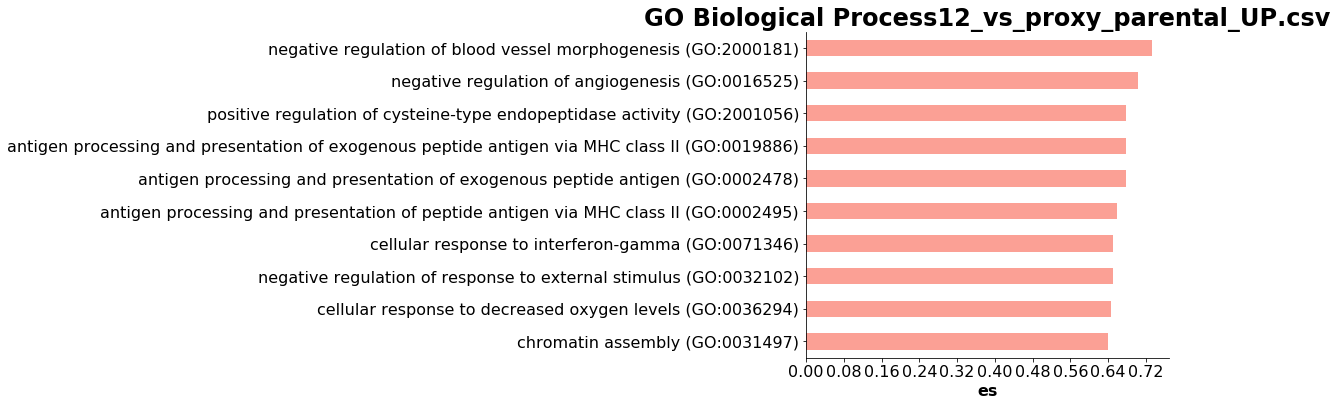

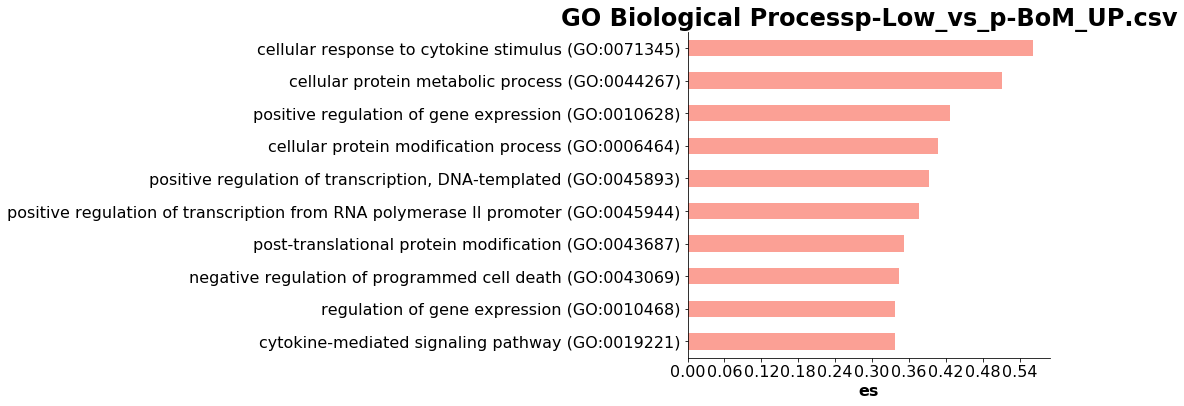

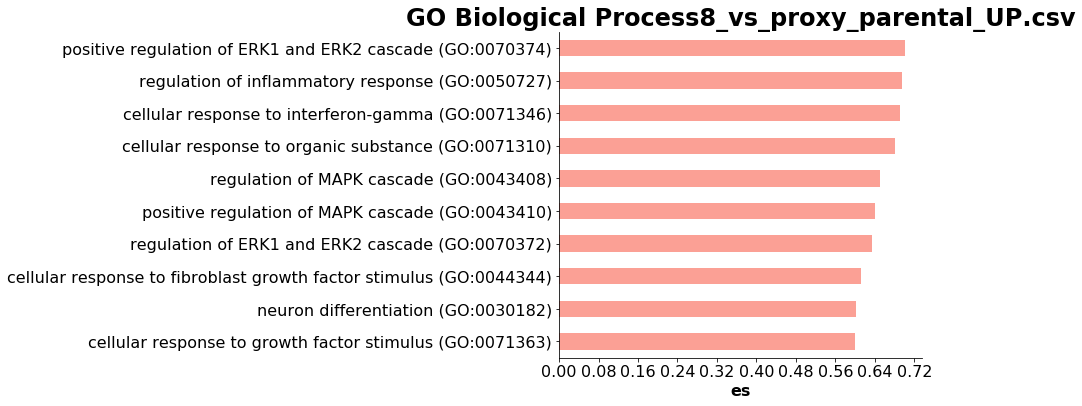

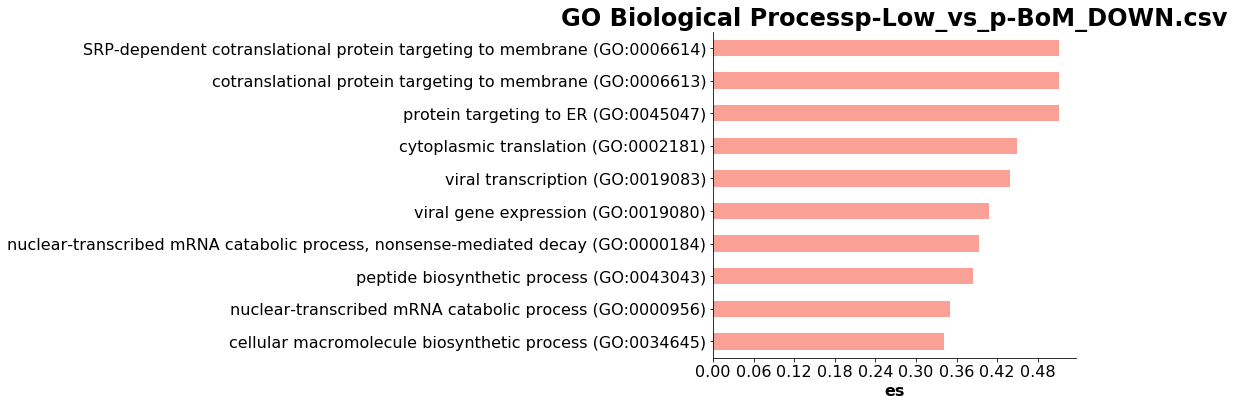

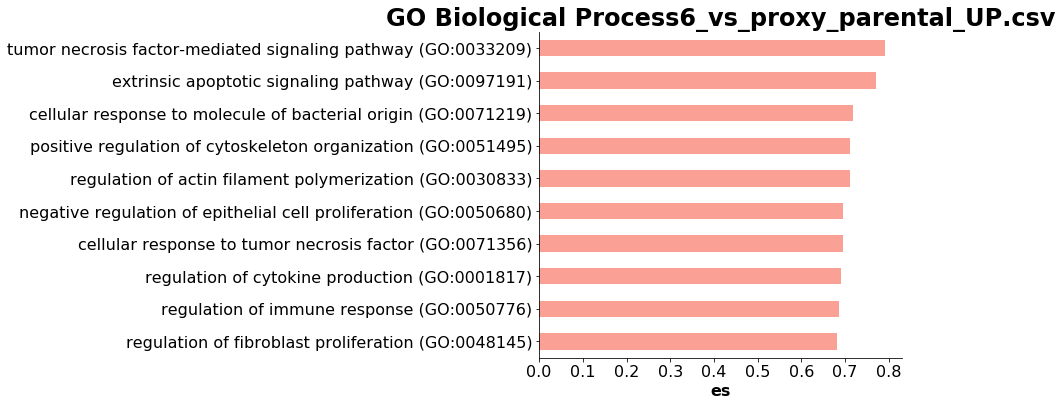

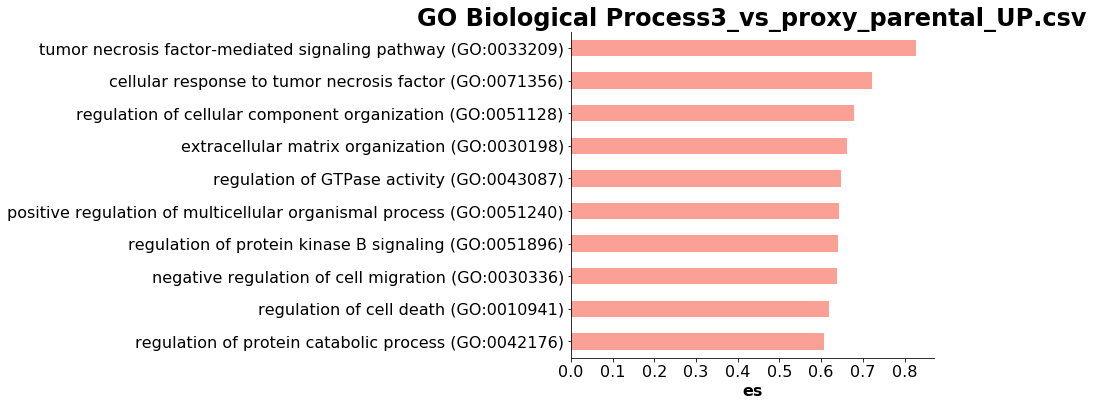

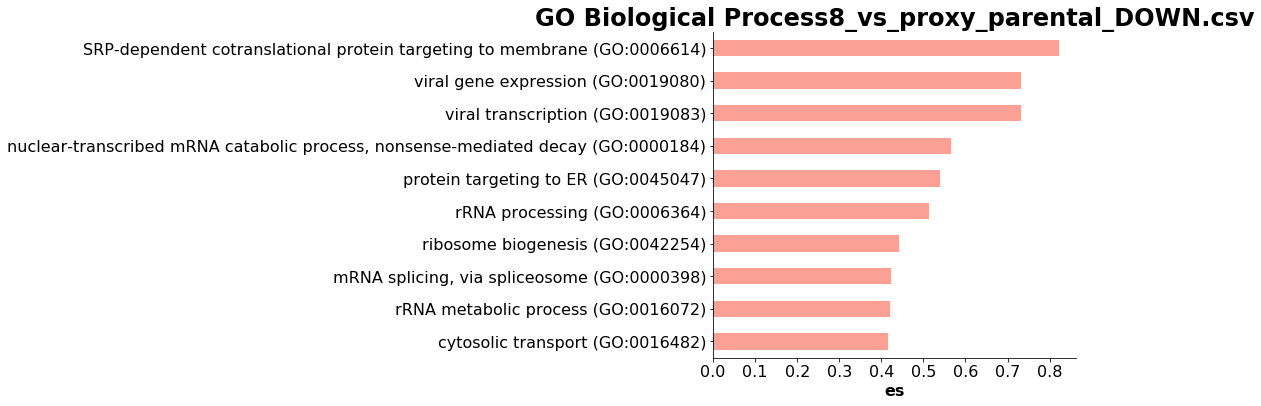

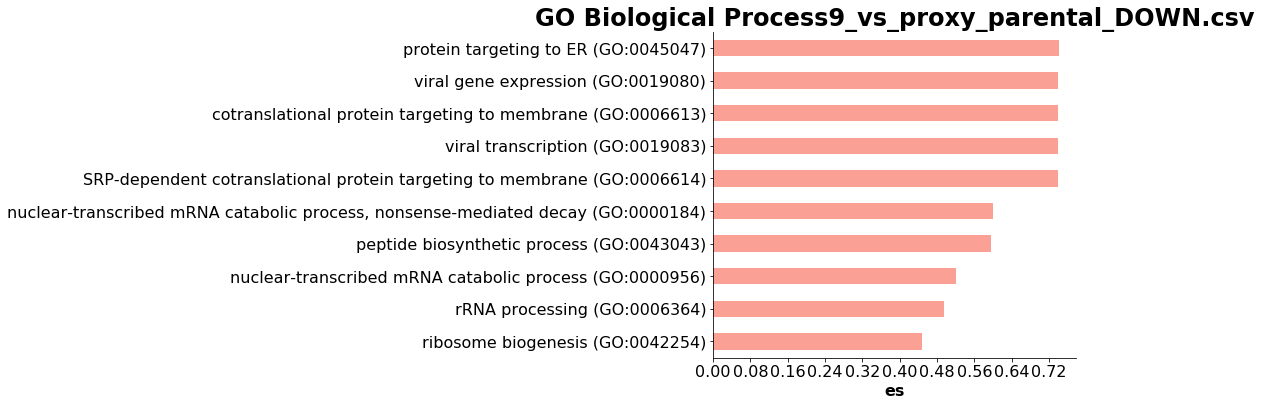

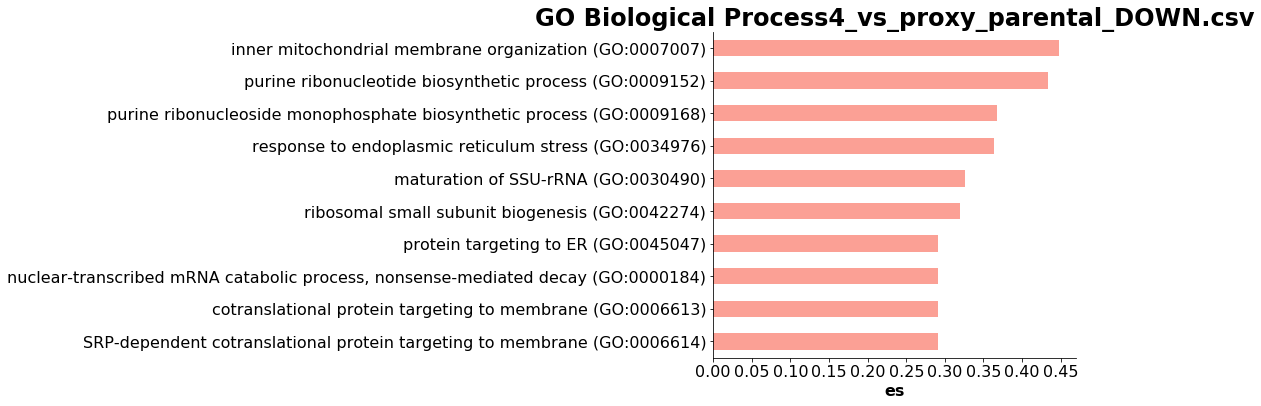

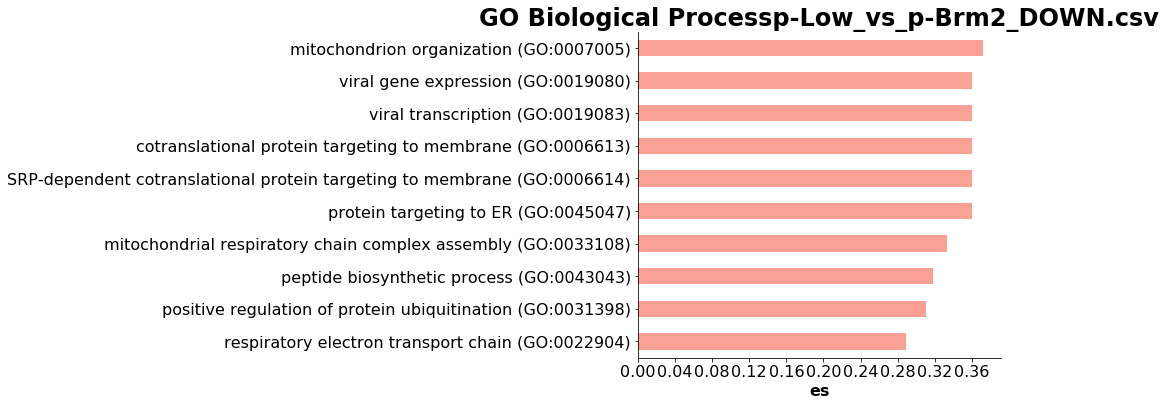

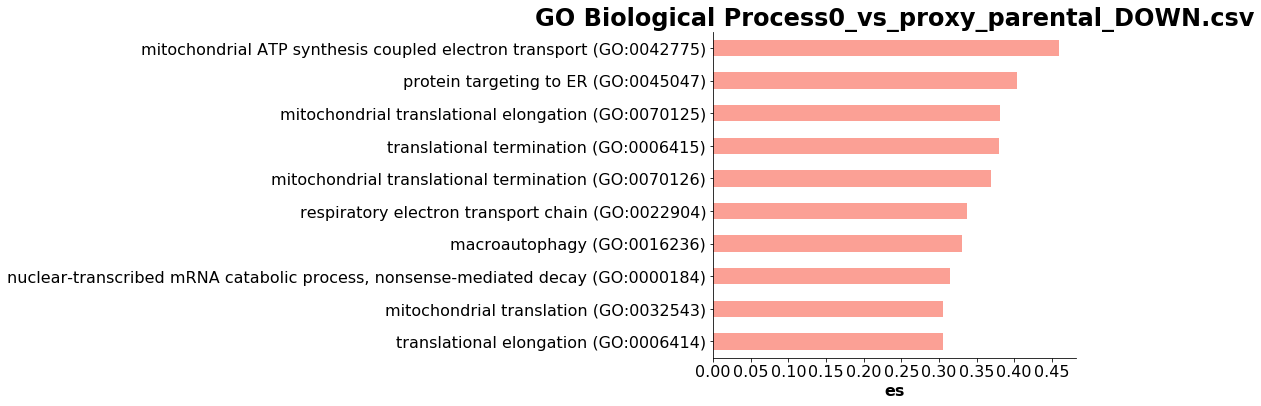

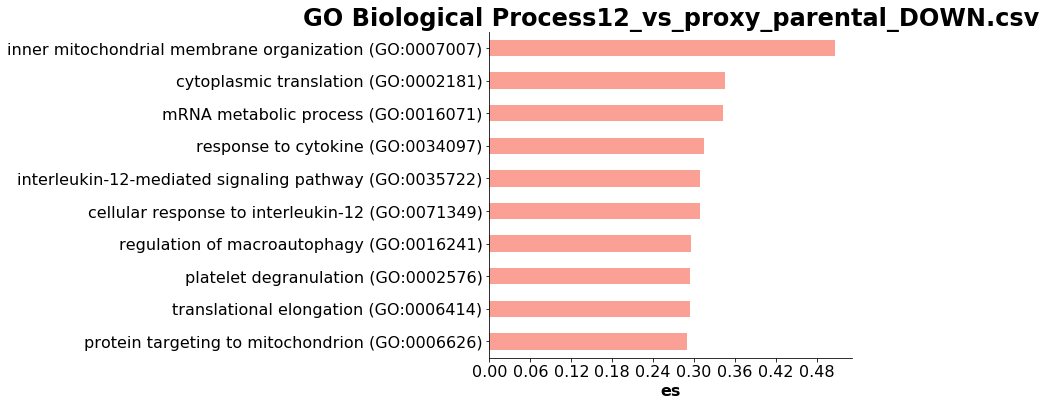

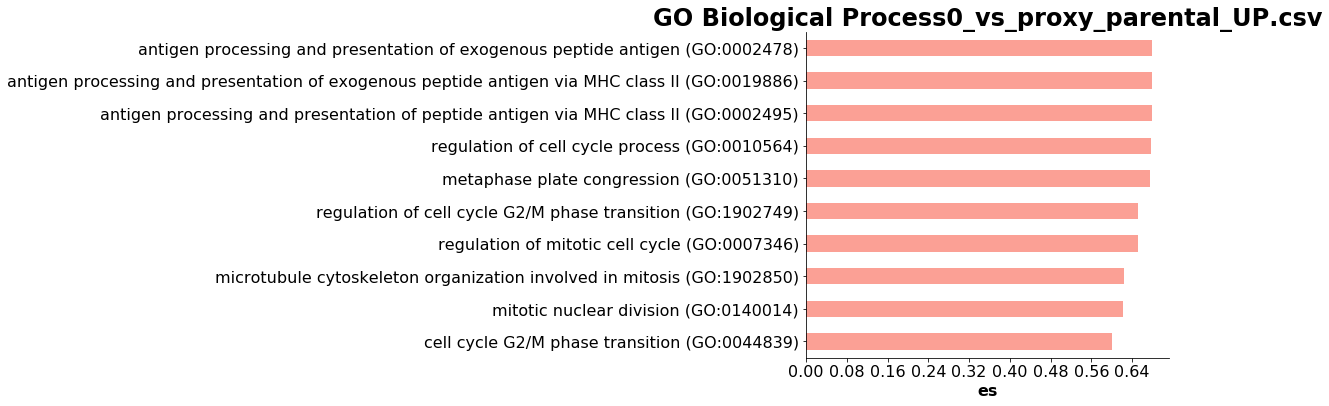

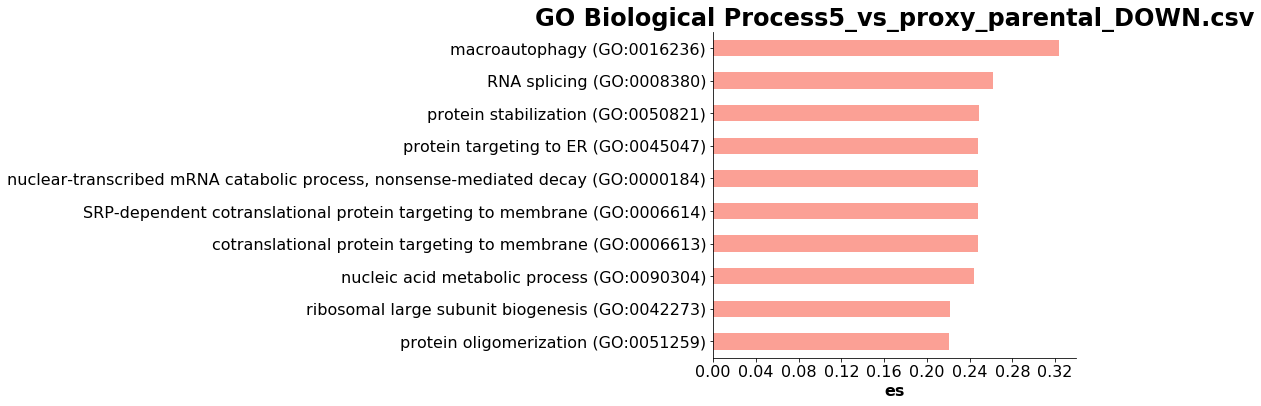

In [5]:
for file in os.listdir(datasetDir):
    print(file)
    if '.csv' in file and file != '10_vs_proxy_parental_DOWN.csv':
        # Prerank gene list
        ## Only contains two columns, or one cloumn with gene_name indexed when assign a DataFrame to prerank
        rnk = pd.read_csv(datasetDir + file,index_col=0)
        rnk = rnk[['genes','logfoldchange']]
        
        # run prerank
        # enrichr libraries are supported by prerank module. Just provide the name
        # use 4 process to acceralate the permutation speed

        # note: multiprocessing may not work on windows
        #pre_res = gp.prerank(rnk=rnk, gene_sets='KEGG_2019_Human',
                             #permutation_num=100, # reduce number to speed up testing
                             #outdir='GSEA//'+sample+'//'+file.split('.')[0]+'_prerank_report_KEGG', format='png')

        pre_res2 = gp.prerank(rnk=rnk, gene_sets='GO_Biological_Process_2018',
                              permutation_num=1000, # reduce number to speed up testing
                              outdir='GSEA//'+sample+'//'+file.split('.')[0]+'_prerank_report_GO', format='png')

        
        # Barplot
        #barplot(pre_res.res2d.reset_index(),title='KEGG Pathways' + file,column='es',)

        #plt.savefig('GSEA//'+sample+'//'+file.split('.')[0]+'prerank_report_KEGG.png',bbox_inches='tight')

        barplot(pre_res2.res2d.reset_index(),title='GO Biological Process' + file ,column='es',)

        plt.savefig('GSEA//'+sample+'//'+file.split('.')[0]+'prerank_report_GO.png',bbox_inches='tight')